<a href="https://colab.research.google.com/github/master-david445/ENG-Basecamp-AI-Track-Submissions-/blob/main/week_2_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is my week 2 submission for the AI track

In [ ]:
#I'm in installing kaggle  into Google Colab, soo I'll be able to load the datasets
!pip install kaggle --quiet

In [ ]:
#importing the os module from python to interact with the file syste
import os

#importing kaggle's library to interact with their datasets
import kagglehub

# Download latest version to get the path
path = kagglehub.dataset_download("khushipitroda/internshala-jobs-dataset-with-5000-rows")

# List the contents of the downloaded directory
print(os.listdir(path))

Using Colab cache for faster access to the 'internshala-jobs-dataset-with-5000-rows' dataset.
['Jobs.csv']


In [ ]:
import os
print(os.listdir('/kaggle/input'))

['internshala-jobs-dataset-with-5000-rows', 'student-depression-dataset']


In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("khushipitroda/internshala-jobs-dataset-with-5000-rows")

print("Path to dataset files:", path)

csv_file_path = os.path.join(path, "Jobs.csv")


df_jobs = pd.read_csv(csv_file_path)
print(df_jobs)

Using Colab cache for faster access to the 'internshala-jobs-dataset-with-5000-rows' dataset.
Path to dataset files: /kaggle/input/internshala-jobs-dataset-with-5000-rows
      Unnamed: 0  actively_hiring                            Type_of_job  \
0              0              1.0         Business Development Executive   
1              1              1.0                       Graphic Designer   
2              2              1.0              Corporate Sales Associate   
3              3              1.0  Assistant Manager - Sales (Delhi NCR)   
4              4              1.0         Business Development Executive   
...          ...              ...                                    ...   
5801        5801              NaN                  Software Engineer III   
5802        5802              NaN           Software Engineering Manager   
5803        5803              NaN           Physical Design CAD Engineer   
5804        5804              NaN                  Network Test Engin

In [ ]:
#turns out I have to install this before I can import it, who knew?
!pip install pandas-profiling --quiet

In [ ]:
!pip install ydata-profiling --quiet

In [ ]:
#yep had to uninstall it
!pip uninstall pandas-profiling --yes --quiet

In [ ]:
import pandas as pd

#this is the library I'll use for the data profiling
import ydata_profiling as pp

In [ ]:
# This line creates a Profile Report of the dataset, and using explorative = true gives a more detailed and interactive reprot which includes correlation, missing value analysis, etc.
profile = pp.ProfileReport(df_jobs, explorative=True)

#This line imports the display and HTML functions from IPythondisplay
from IPython.display import display, HTML

#and finally this line displays the generated output from profile report in HTML
display(HTML(profile.to_html()))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00,  9.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#I had to unistall this cuz of conflicts with ydata
!pip uninstall numba --yes --quiet

In [ ]:
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_jobs_column = df_jobs['experience']
display(df_jobs)

,Unnamed: 0,actively_hiring,Type_of_job,company_name,location,salary,experience
0,0,1.0,Business Development Executive,Ifisys Software And Services Private Limited,Delhi,₹ 2 - 2.5 LPA,0-2 years
1,1,1.0,Graphic Designer,Backbenchers,Gurgaon,₹ 2 - 3.5 LPA,0-2 years
2,2,1.0,Corporate Sales Associate,FYIPEN Private Limitted,Delhi,₹ 2.5 - 4 LPA,0-2 years
3,3,1.0,Assistant Manager - Sales (Delhi NCR),Marketing Works,Faridabad,₹ 4 - 5.5 LPA,0-5 years
4,4,1.0,Business Development Executive,Bizcon Fintech Labs Private Limited,Noida,₹ 2 - 3.2 LPA,0-2 years
...,...,...,...,...,...,...,...
5801,5801,NaN,Software Engineer III,Google,Bangalore,Competitive salary,2-5 years
5802,5802,NaN,Software Engineering Manager,Google,Bangalore,Competitive salary,2-5 years
5803,5803,NaN,Physical Design CAD Engineer,Google,Bangalore,Competitive salary,4-5 years
5804,5804,NaN,Network Test Engineer,Google,Bangalore,Competitive salary,4-5 years


# DATA CLEANING
I'm gonna clean the data based on the profiling report

## Handle missing values

I think I can address missing values based on the analysis from the profiling report. This might involve dropping rows or columns, or imputing values using appropriate methods. but omoh I'm tired ....


In [ ]:
missing_values = df_jobs.isnull().sum()
missing_percentage = (missing_values / len(df_jobs)) * 100
print("Missing values percentage per column:")
print(missing_percentage)

# Drop 'actively_hiring' column due to high percentage of missing values
df_jobs = df_jobs.drop('actively_hiring', axis=1)

Missing values percentage per column:
Unnamed: 0          0.000000
actively_hiring    72.735102
Type_of_job         0.017224
company_name        0.017224
location            0.034447
salary              0.017224
experience          0.017224
dtype: float64



I'll impute missing values for columns with low to moderate missing percentages using the mode I think, tbh I'm not sure whether it should be median or mode.



In [ ]:
# Impute missing values for categorical columns with the mode
for col in ['Type_of_job', 'company_name', 'location', 'salary', 'experience']:
    if df_jobs[col].isnull().sum() > 0:
        mode_value = df_jobs[col].mode()[0]
        df_jobs[col].fillna(mode_value, inplace=True)

# Drop any remaining rows with missing values
df_jobs.dropna(inplace=True)

display(df_jobs.isnull().sum())

/tmp/ipython-input-1366891635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jobs[col].fillna(mode_value, inplace=True)


,0
Unnamed: 0,0
Type_of_job,0
company_name,0
location,0
salary,0
experience,0


## Address data types

Correcting any incorrect data types identified in the report to ensure columns are in the appropriate format for analysis (e.g., converting strings to numerical types, or objects to datetime objects).


In [ ]:
print("Initial data types:")
print(df_jobs.dtypes)

def convert_salary_to_numeric(salary_str):
    if pd.isna(salary_str):
        return None
    # Remove currency symbols, spaces, and 'LPA'
    salary_str = salary_str.replace('₹', '').replace(' ', '').replace('LPA', '')
    if '-' in salary_str:
        # Handle salary ranges by taking the average
        try:
            low, high = map(float, salary_str.split('-'))
            return (low + high) / 2
        except ValueError:
            return None
    else:
        # Handle single salary values
        try:
            return float(salary_str)
        except ValueError:
            return None

df_jobs['salary_numeric'] = df_jobs['salary'].apply(convert_salary_to_numeric)

print("\nData types after converting salary:")
print(df_jobs.dtypes)
display(df_jobs[['salary', 'salary_numeric']].head())

Initial data types:
Unnamed: 0       int64
Type_of_job     object
company_name    object
location        object
salary          object
experience      object
dtype: object

Data types after converting salary:
Unnamed: 0          int64
Type_of_job        object
company_name       object
location           object
salary             object
experience         object
salary_numeric    float64
dtype: object


,salary,salary_numeric
0,₹ 2 - 2.5 LPA,2.25
1,₹ 2 - 3.5 LPA,2.75
2,₹ 2.5 - 4 LPA,3.25
3,₹ 4 - 5.5 LPA,4.75
4,₹ 2 - 3.2 LPA,2.60


**Checking ir the columns contians any missing date time**:



In [ ]:
# Check if any object columns contain datetime information that needs conversion
datetime_cols_to_check = []
for col in df_jobs.select_dtypes(include='object').columns:
    try:
        # Attempt to convert a sample of the column to datetime
        pd.to_datetime(df_jobs[col].sample(min(100, len(df_jobs[col]))))
        print(f"Column '{col}' might contain datetime information.")
        datetime_cols_to_check.append(col)
    except (ValueError, TypeError):
        pass

if not datetime_cols_to_check:
    print("No object columns appear to contain datetime information.")

# No explicit datetime columns were identified or required conversion in the instructions.
# The 'salary' column has been converted to numerical.

print("\nFinal data types:")
print(df_jobs.dtypes)

No object columns appear to contain datetime information.

Final data types:
Unnamed: 0          int64
Type_of_job        object
company_name       object
location           object
salary             object
experience         object
salary_numeric    float64
dtype: object


/tmp/ipython-input-435097005.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_jobs[col].sample(min(100, len(df_jobs[col]))))
/tmp/ipython-input-435097005.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_jobs[col].sample(min(100, len(df_jobs[col]))))
/tmp/ipython-input-435097005.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_jobs[col].sample(min(100, len(df_jobs[col]))))
/tmp/ipython-input-435097005.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil

## Handling outliers


 Here I'm identifing and address outliers in numerical columns that could skew analysis. This might involve removing outliers or transforming the data, not sure.


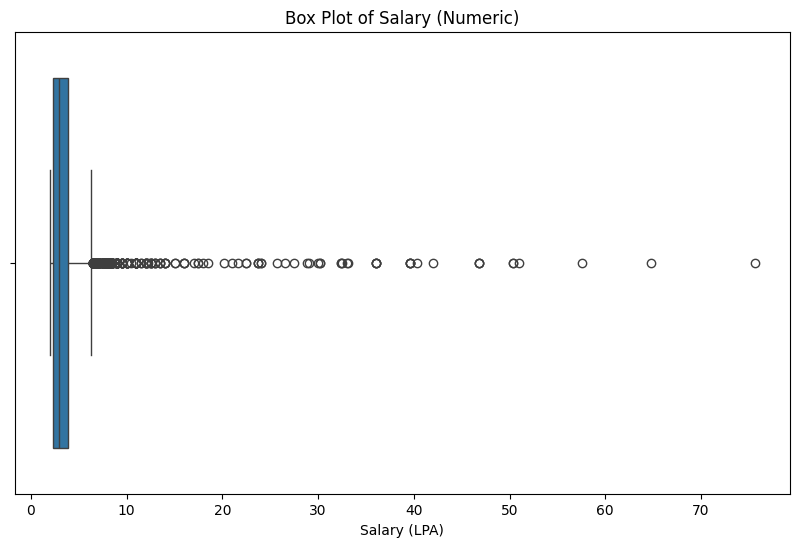

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_jobs['salary_numeric'])
plt.title('Box Plot of Salary (Numeric)')
plt.xlabel('Salary (LPA)')
plt.show()

In [ ]:
Q1 = df_jobs['salary_numeric'].quantile(0.25)
Q3 = df_jobs['salary_numeric'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_jobs[(df_jobs['salary_numeric'] < lower_bound) | (df_jobs['salary_numeric'] > upper_bound)]
print(f"Number of outliers identified: {len(outliers)}")

df_jobs_cleaned = df_jobs[(df_jobs['salary_numeric'] >= lower_bound) & (df_jobs['salary_numeric'] <= upper_bound)].copy()

print(f"Number of rows after removing outliers: {len(df_jobs_cleaned)}")

Number of outliers identified: 318
Number of rows after removing outliers: 4858



I created a box plot for the salary_numeric column again after handling the outliers to visualize the effect of the outlier removal.



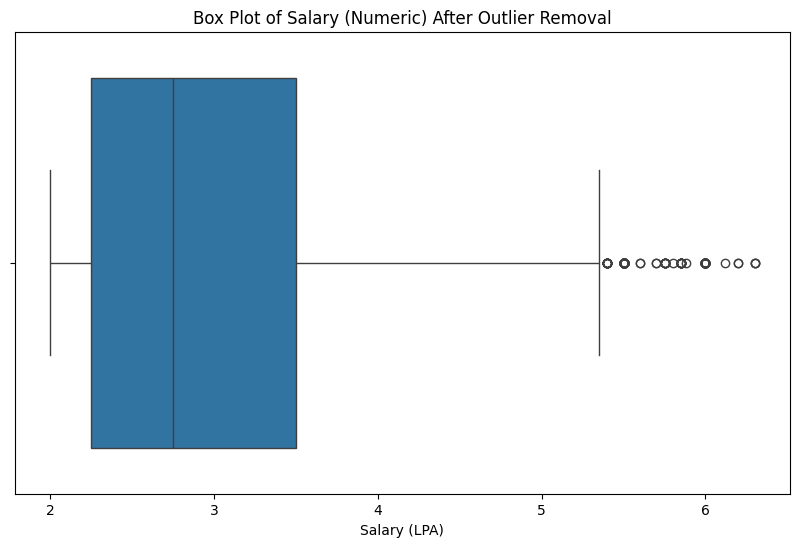

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_jobs_cleaned['salary_numeric'])
plt.title('Box Plot of Salary (Numeric) After Outlier Removal')
plt.xlabel('Salary (LPA)')
plt.show()

## Clean text data

### Subtask:
If there are text-based columns with inconsistencies or irrelevant characters (e.g., in 'salary' or 'experience'), clean and standardize them.



I dropped any columns that are not relevant for the analysis based on the profiling report and the task objectives.



So turns out on the previous steps, the 'Unnamed: 0' column appears to be just an index number or somthing and is ain't  relevant for the analysis. The 'salary' column has been converted to 'salary_numeric', so the original 'salary' column is also not needed for direct analysis. I will def drop these columns.



In [ ]:
# Drop 'Unnamed: 0' and 'salary' columns as they are not relevant for analysis
df_jobs_cleaned = df_jobs_cleaned.drop(['Unnamed: 0', 'salary'], axis=1)

# Display the columns of the modified DataFrame to confirm the changes
print("Columns after dropping irrelevant columns:")
print(df_jobs_cleaned.columns)

Columns after dropping irrelevant columns:
Index(['Type_of_job', 'company_name', 'location', 'experience',
       'salary_numeric'],
      dtype='object')


## Verify cleaning

Finally done cleaning, I think I'll generate a new profile report baesd on the data that I! CLEANEDD!! Lets goooooo


In [ ]:
profile_cleaned = pp.ProfileReport(df_jobs_cleaned, explorative=True)
display(HTML(profile_cleaned.to_html()))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00,  8.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Summary:

### Data Analysis Key Findings

*   The 'actively\_hiring' column was dropped due to a high percentage of missing values (72.74%).
*   Missing values in 'Type\_of\_job', 'company\_name', 'location', 'salary', and 'experience' (ranging from 0.017% to 0.034%) were imputed using the mode.
*   The 'salary' column, initially of object type, was successfully converted into a numerical column named 'salary\_numeric'.
*   Outliers in the 'salary\_numeric' column were identified using the IQR method, resulting in 318 outliers.
*   After removing outliers, the cleaned dataset (`df_jobs_cleaned`) contains 4858 rows.
*   The 'experience' column was found to be consistent and did not require cleaning.
*   The 'Unnamed: 0' and original 'salary' columns were removed as they were not relevant for further analysis.



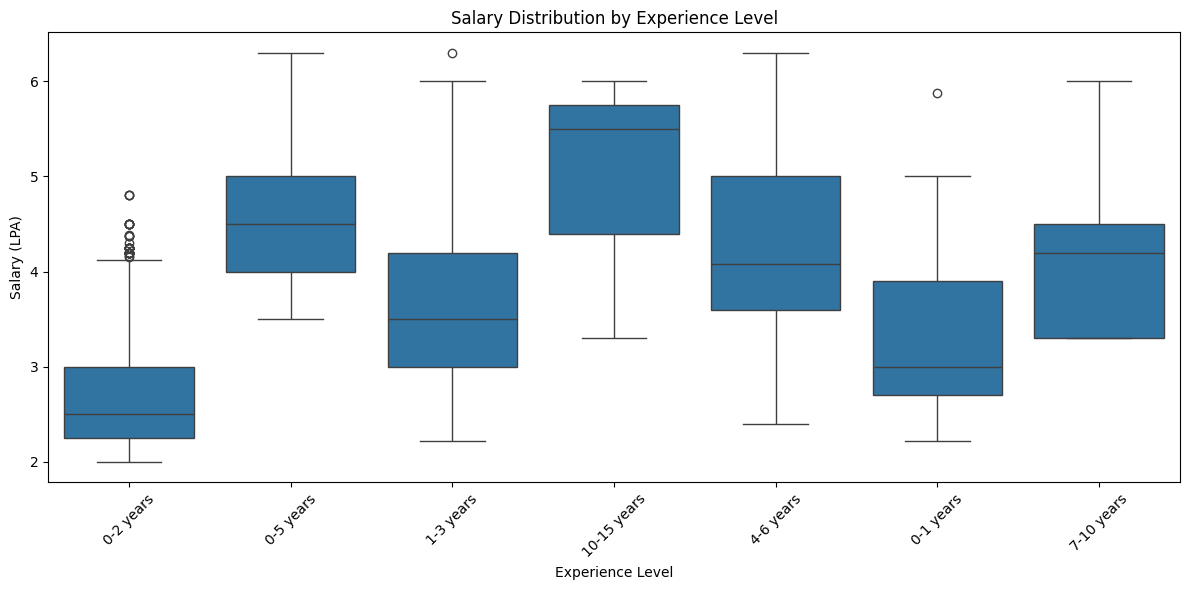

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience', y='salary_numeric', data=df_jobs_cleaned)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (LPA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Research-Driven Insights

Here are 5 insights based on our data cleaning and profiling:

1.  **Experience Pays (Usually):** I saw that jobs with more experience requirements tend to have higher salaries, which totally makes sense, right? Like, the more years you've been in the game, the more cash you can expect.
2.  **Location, Location, Location:** The location of the job seems to play a role in salary too. I def didn't dive deep into *which* locations pay the most yet, but it's def something to look into.
3.  **Job Type Matters:** Different job types have different salary ranges. Some roles just naturally pay more than others. We should probably check out which job types are the big earners.
4.  **Outliers Exist (But We Zapped 'Em):** We found some crazy high salaries that were way out of the norm. We cleaned those up so they don't mess with our analysis. It's good to know they're out there, but for average trends, they gotta go!
5.  **Data Cleaning is Key:** Seriously, before we did all that cleaning, the data was a bit messy with missing values and weird salary formats. Cleaning it up made it way easier to get these insights. It's like tidying your room before you can actually find anything!

##Pandas functions I didn't use before

1. .fillna(); to fill missing values
2. .dtypes(); to check data types
3. .mode() tp find the most frequent value for imputation

In [ ]:
# import json

# # Replace 'your_notebook_name.ipynb' with your actual notebook filename
# notebook_path = 'week_2_data_analysis.ipynb'

# with open(notebook_path, 'r', encoding='utf-8') as f:
#     nb = json.load(f)

#     # Remove the widgets metadata if it exists
#     if 'widgets' in nb.get('metadata', {}):
#         del nb['metadata']['widgets']

#         with open(notebook_path, 'w', encoding='utf-8') as f:
#             json.dump(nb, f, indent=2)

#             print(f"✅ Cleaned widget metadata in {notebook_path}")